# Soil Moisture Dataset

Soil Moisture Dataset

Libraries we need are imported first

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import xarray as xr
from scipy.interpolate import griddata
from scipy import interpolate

Data used in this exercise is stored in the DATA folder

In [123]:
thefile = '../../../DATA/TPdata_199301'

The dataframe is created using the .read_csv function of Pandas

In [153]:
data = pd.read_csv(thefile, sep='\t', header=None)
data

,0,1,2,3,4,5,6,7,8
0,1.0,-89.875,-60.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,-89.875,60.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,-89.875,180.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,-89.625,-20.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,-89.625,20.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
660061,660062.0,89.625,-100.0,NaN,NaN,NaN,NaN,NaN,NaN
660062,660063.0,89.625,-60.0,NaN,NaN,NaN,NaN,NaN,NaN
660063,660064.0,89.875,-60.0,NaN,NaN,NaN,NaN,NaN,NaN
660064,660065.0,89.875,60.0,NaN,NaN,NaN,NaN,NaN,NaN


The original CSV file is structured as a dataframe with the corresponding categories

In [156]:
data.columns = ["cellNr", "latitude", "longitude", "backscatter","emissivity_v","emissivity_h","ts_amplitude","ndvi","lmd_soilWetness"]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660066 entries, 0 to 660065
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   cellNr           660066 non-null  float64
 1   latitude         660066 non-null  float64
 2   longitude        660066 non-null  float64
 3   backscatter      660066 non-null  object 
 4   emissivity_v     660066 non-null  object 
 5   emissivity_h     660066 non-null  object 
 6   ts_amplitude     660066 non-null  object 
 7   ndvi             660066 non-null  object 
 8   lmd_soilWetness  660066 non-null  object 
dtypes: float64(3), object(6)
memory usage: 45.3+ MB


In [168]:
data = data.replace('   NaN',np.NaN)
data

,cellNr,latitude,longitude,backscatter,emissivity_v,emissivity_h,ts_amplitude,ndvi,lmd_soilWetness
0,1.0,-89.875,-60.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,-89.875,60.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,-89.875,180.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,-89.625,-20.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,-89.625,20.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
660061,660062.0,89.625,-100.0,NaN,NaN,NaN,NaN,NaN,NaN
660062,660063.0,89.625,-60.0,NaN,NaN,NaN,NaN,NaN,NaN
660063,660064.0,89.875,-60.0,NaN,NaN,NaN,NaN,NaN,NaN
660064,660065.0,89.875,60.0,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
data['backscatter'] = pd.to_numeric(data['backscatter'])
data['emissivity_v'] = pd.to_numeric(data['emissivity_v'])
data['emissivity_h'] = pd.to_numeric(data['emissivity_h'])
data['ts_amplitude'] = pd.to_numeric(data['ts_amplitude'])
data['ndvi'] = pd.to_numeric(data['ndvi'])
data['lmd_soilWetness'] = pd.to_numeric(data['lmd_soilWetness'])

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660066 entries, 0 to 660065
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   cellNr           660066 non-null  float64
 1   latitude         660066 non-null  float64
 2   longitude        660066 non-null  float64
 3   backscatter      79159 non-null   float64
 4   emissivity_v     81070 non-null   float64
 5   emissivity_h     81070 non-null   float64
 6   ts_amplitude     55681 non-null   float64
 7   ndvi             81137 non-null   float64
 8   lmd_soilWetness  68982 non-null   float64
dtypes: float64(9)
memory usage: 45.3 MB


In [186]:
# data.dropna()
data.describe()

,cellNr,latitude,longitude,backscatter,emissivity_v,emissivity_h,ts_amplitude,ndvi,lmd_soilWetness
count,660066.000000,660066.000000,660066.000000,79159.000000,81070.000000,81070.000000,55681.000000,81137.000000,68982.000000
mean,330033.500000,0.000000,0.084537,-11.809665,0.966447,0.911618,24.035404,0.341698,0.479404
std,190544.785729,39.171964,103.923274,3.688083,0.017271,0.047736,11.089443,0.223595,0.227891
min,1.000000,-89.875000,-180.000000,-27.228800,0.687300,0.389900,1.327500,-0.031400,0.000000
25%,165017.250000,-30.125000,-89.923100,-13.718550,0.956700,0.872800,14.552900,0.124000,0.277300
50%,330033.500000,0.000000,0.132500,-10.855700,0.965800,0.927400,24.135700,0.301100,0.426850
75%,495049.750000,30.125000,90.079200,-9.054200,0.976300,0.949100,31.874400,0.565000,0.644800
max,660066.000000,89.875000,180.000000,-5.485400,1.034200,1.010900,62.281600,0.794700,1.011300


In [188]:
back = data['backscatter'].values
lats = data['latitude'].values
lons = data['longitude'].values
emissivity_v = data['emissivity_v'].values
emissivity_h = data['emissivity_h'].values
ts_amplitude = data['ts_amplitude'].values
ndvi = data['ndvi'].values
lmd_soilWetness = data['lmd_soilWetness'].values

In [190]:
lats

array([-89.875, -89.875, -89.875, ...,  89.875,  89.875,  89.875])

In [192]:
lons

array([-60.,  60., 180., ..., -60.,  60., 180.])

In [194]:
Yi = np.linspace(np.min(lats.data),float(np.max(lats.data)),180)
Xi = np.linspace(np.min(lons.data),float(np.max(lons.data)),360)
X, Y = np.meshgrid(Xi,Yi)

In [196]:
points = list(zip(lons, lats))
# points

In [198]:
back_gridded = griddata(points, back, (X, Y), method='nearest')
emissivity_v_gridded = griddata(points, emissivity_v, (X, Y), method='nearest')
emissivity_h_gridded = griddata(points, emissivity_h, (X, Y), method='nearest')
ts_amplitude_gridded = griddata(points, ts_amplitude, (X, Y), method='nearest')
ndvi_gridded = griddata(points, ndvi, (X, Y), method='nearest')
lmd_soilWetness_gridded = griddata(points, lmd_soilWetness, (X, Y), method='nearest')

In [200]:
len(back_gridded[0])

360

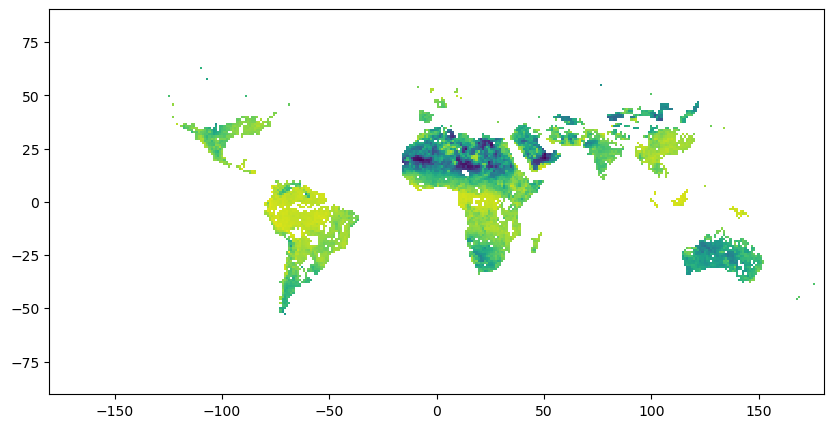

In [204]:
fig,ax = pl.subplots(figsize=(10, 5))
ax.pcolormesh(X,Y,back_gridded);